### Imports

In [1]:
# stdlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline

# project
from algorithms.em_hmm import EmHmm
from algorithms.emgaussians import EMGaussians

/home/lawliet/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


### Load data

In [2]:
data = pd.read_csv("data/EMGaussian.data", sep=" ", names=["x1", "x2"])
test = pd.read_csv("data/EMGaussian.test", sep=" ", names=["x1", "x2"])

In [3]:
X_data = np.array(data)
X_test = np.array(test)

### Initialization

In [15]:
emi = EMGaussians()
emi.fit(X_data)

In [16]:
means = emi.means.reshape(4,2)
sigmas = emi.sigmas

### HMM

In [6]:
hmm = EmHmm(means=means, sigmas=sigmas)
hmm.fit(X_data)

/media/lawliet/Unlimited Burst/Study/PGM/hw/DM3/code/algorithms/em_hmm.py:99: RuntimeWarning: divide by zero encountered in log
  self._alpha[0, :] = np.log(self.pi0) + self._log_obs[0, :]


19


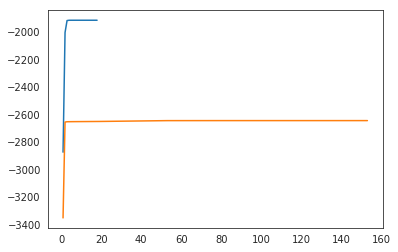

In [21]:
plt.plot(hmm.log_likelihood)
print(len(hmm.log_likelihood))
plt.plot(emi.log_likelihood)

In [8]:
idd = hmm.decode(X_data)
means_h = hmm.means

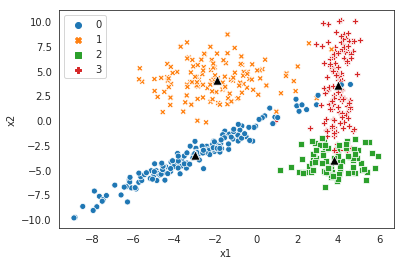

In [14]:
colors = sns.color_palette()
gg = colors[:4]
sns.scatterplot(x="x1", y="x2", data=data, hue=idd, palette=gg, style=idd)
sns.scatterplot(x=means_h[:, 0], y=means_h[:, 1], color=["black"], s = 85, marker="^")
plt.savefig("../report/train.png")

-1916.4046590952996


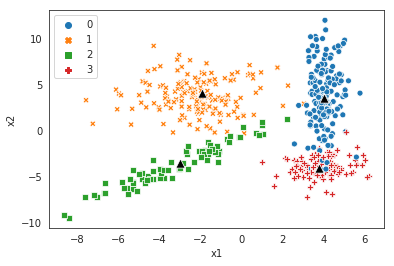

In [20]:
hmm = EmHmm(means=means, sigmas=sigmas)
hmm.fit(X_test)
idt = hmm.decode(X_test)
print(hmm.log_likelihood[-1])
sns.scatterplot(x="x1", y="x2", data=test, hue=idt, palette=gg, style=idt)
sns.scatterplot(x=means_h[:, 0], y=means_h[:, 1], color=["black"], s = 85, marker="^")
plt.savefig("../report/test.png")